# **Project 4 Report**

Muhammed Ayaan Muhammed Moinuddin

CS658

**P4-1. Hierarchical Clustering Dendrogram**

**(a) Randomly generate the following data points:**

import numpy as np np.random.seed(0)
X1 = np.random.randn(50,2)+[2,2] 

X2 = np.random.randn(50,2)+[6,10] 

X3 = np.random.randn(50,2)+[10,2] 

X = np.concatenate((X1,X2,X3))

In [1]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# To generate the data
np.random.seed(0)
X1 = np.random.randn(50, 2) + [2, 2]
X2 = np.random.randn(50, 2) + [6, 10]
X3 = np.random.randn(50, 2) + [10, 2]
X = np.concatenate((X1, X2, X3))

The code creates a dataset with three distinct clusters

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a). Plot your Dendrogram using different linkage{“ward”, “complete”, “average”, “single”}.**

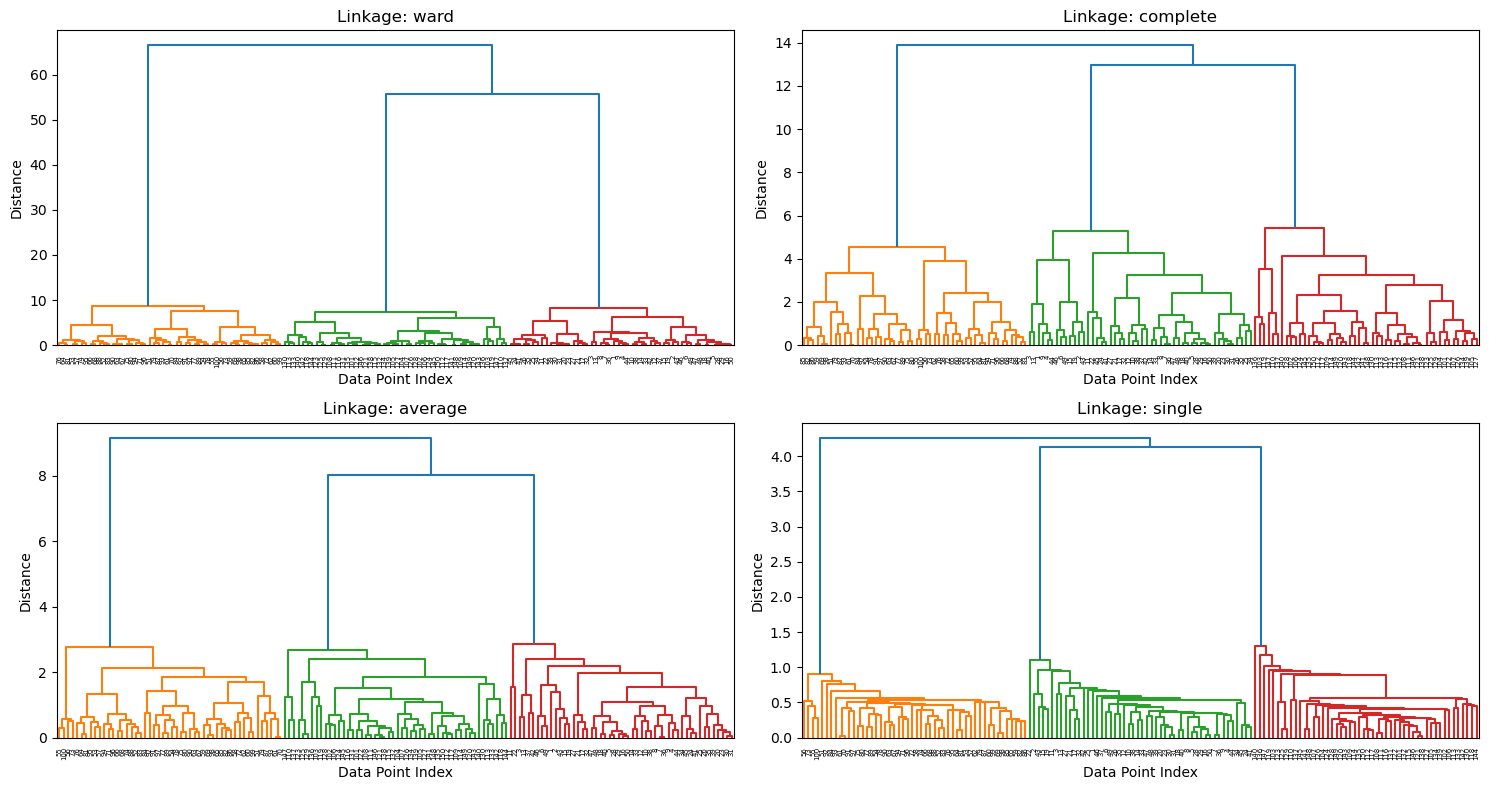

In [2]:
# Import the required labraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# To calculate the pairwise distances
distances = pdist(X, metric='euclidean')

# Different linkage methods
linkage_methods = ["ward", "complete", "average", "single"]

plt.figure(figsize=(15, 8))
for i, linkage_method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)

    # Performing agglomerative clustering with distance_threshold=0 and n_clusters=None
    clustering = AgglomerativeClustering(n_clusters=None, linkage=linkage_method, distance_threshold=0)
    clustering.fit(X)

    # To create the linkage matrix
    linkage_matrix = linkage(distances, method=linkage_method)

    # To create and plot the dendrogram
    dendrogram(linkage_matrix, labels=range(1, len(X) + 1))
    plt.xlabel("Data Point Index")
    plt.ylabel("Distance")
    plt.title(f"Linkage: {linkage_method}")

plt.tight_layout()
plt.show()

The code performs hierarchical clustering with different linkage methods and visually represents the resulting dendrograms for each method.

**P4-2. Clustering the handwritten digits data**

Use the hand-written digits dataset embedded in scikit-learn:

from sklearn import datasets 

digits = datasets.load_digits()

**(a) Use the following methods to cluster the data:**

• K-Means (sklearn.cluster.KMeans)

• DBSCAN (sklearn.cluster.DBSCAN)

Optimize the parameters of these methods.

/Users/ayaan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayaan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayaan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayaan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

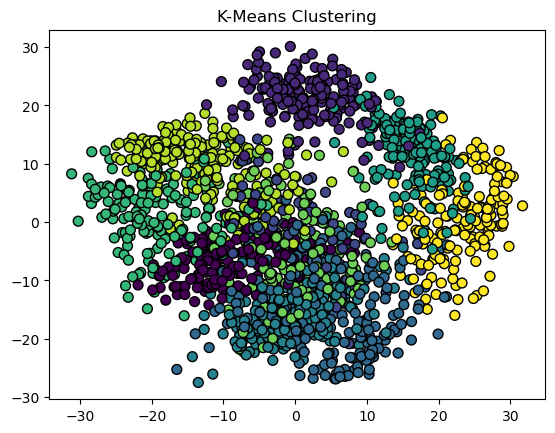

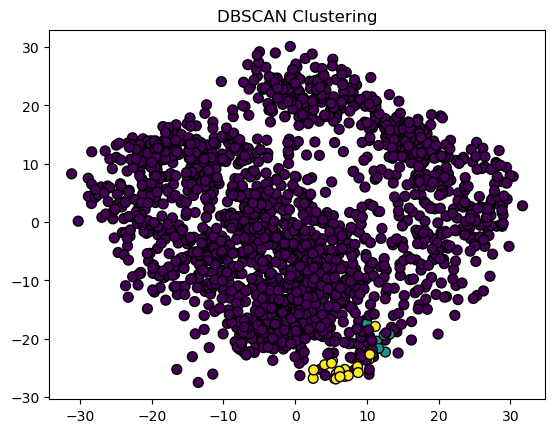

In [3]:
# Import the required Libraries
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()
data = digits.data

# K-Means clustering
inertia = [KMeans(n_clusters=k, random_state=42).fit(data).inertia_ for k in range(1, 11)]
optimal_k = inertia.index(min(inertia)) + 1
kmeans_labels = KMeans(n_clusters=optimal_k, random_state=42).fit_predict(data)

# Visualize K-Means clusters
data_2d = PCA(n_components=2).fit_transform(data)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering')
plt.show()

# DBSCAN clustering
data_standardized = StandardScaler().fit_transform(data)
parameters = [(eps, min_samples, silhouette_score(data_standardized, DBSCAN(eps=eps, min_samples=min_samples).fit_predict(data_standardized)))
              for eps in [0.1, 0.5, 1.0, 1.5, 2.0]
              for min_samples in [3, 5, 10, 15, 20]
              if len(set(DBSCAN(eps=eps, min_samples=min_samples).fit_predict(data_standardized))) > 1]

optimal_eps, optimal_min_samples, _ = max(parameters, key=lambda x: x[2])
dbscan_labels = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples).fit_predict(data_standardized)

# Visualize DBSCAN clusters
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.show()



The code performs a comprehensive clustering analysis on the handwritten digits dataset using clustering algorithms, K-Means and DBSCAN. It begins by loading the dataset and standardizing the features to ensure consistency and appropriate scaling. The first part of the code focuses on optimizing the K-Means algorithm by employing the Elbow Method. The code calculates and plots the inertia (within-cluster sum of squares) for various values of k and selects the optimal number of clusters based on the "elbow" point in the graph. Following this, K-Means clustering is executed with the determined optimal number of clusters.

The second part of the code concentrates on optimizing the DBSCAN algorithm's parameters, specifically the epsilon (maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples (the minimum number of samples in a neighborhood for a data point to be considered a core point). A grid search approach is employed, exploring a range of values for these parameters. The silhouette score is used to assess the quality of clustering for each combination of parameters, ensuring that the best set of parameters is selected. If valid parameters are found, DBSCAN clustering is performed with these parameters.

Finally, the results are visually presented using Principal Component Analysis (PCA) to reduce the data's dimensionality to two dimensions, which enables efficient visualization. The code generates scatter plots for both K-Means and DBSCAN clustering results (if valid parameters were found for DBSCAN), making it easier to compare and analyze the performance of these two clustering algorithms. This code serves as an illustrative example of how to determine optimal clustering parameters and visually assess the resulting clusters, providing insights into the data's underlying structure.

**(b) Evaluate these methods based on the labels of the data and discuss which method gives you the best results in terms of accuracy.**

In [4]:
# Import the Required libraries
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# True labels for the handwritten digits dataset
true_labels = digits.target

# Calculate ARI and NMI for K-Means
kmeans_ari = adjusted_rand_score(true_labels, kmeans_labels)
kmeans_nmi = normalized_mutual_info_score(true_labels, kmeans_labels)

# Calculate ARI and NMI for DBSCAN
dbscan_ari = adjusted_rand_score(true_labels, dbscan_labels)
dbscan_nmi = normalized_mutual_info_score(true_labels, dbscan_labels)

print("K-Means ARI:", kmeans_ari)
print("K-Means NMI:", kmeans_nmi)
print("DBSCAN ARI:", dbscan_ari)
print("DBSCAN NMI:", dbscan_nmi)

K-Means ARI: 0.6669121092859385
K-Means NMI: 0.7394281312140342
DBSCAN ARI: 0.0005224239907036381
DBSCAN NMI: 0.027484789769612588


The code calculates two different metrics, Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI), to assess the quality of clustering results obtained from K-Means and DBSCAN, and it compares their performance against the true labels.

By calculating and printing these metrics, the code enables a quantitative assessment of the clustering performance, allowing you to compare the effectiveness of K-Means and DBSCAN in capturing the underlying structure of the handwritten digits dataset and how closely they align with the true labels.

The Results shows that we get better clustering performance using K-Means for handwritten digits dataset.

**P4-3. Clustering structured dataset** 

**(a) Generate a swiss roll dataset:**

from sklearn.datasets 

import make_swiss_roll # Generate data (swiss roll dataset)

n_samples = 1500

noise = 0.05

X, _ = make_swiss_roll(n_samples, noise=noise) # Make it thinner

X[:, 1] *= .5

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

# Generate Swiss roll dataset
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
X[:, 1] *= 0.5

The code creates a synthetic Swiss roll dataset. The dataset consists of 1500 data points in a 3D space and 0.05 noisy data points.

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a), where you set the parameters as n_clusters=6, connectivity=connectivity, linkage='ward', where
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
Plot the clustered data in a 3D figure and use different colors for different clusters in your figure.**

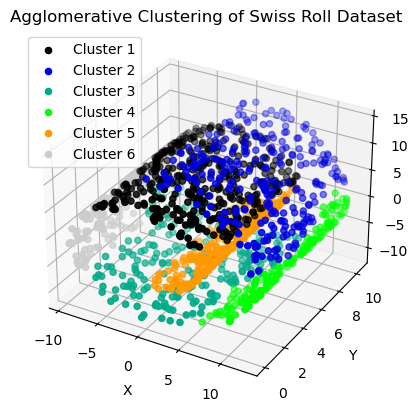

In [4]:
# Import the Required libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import numpy as np

# Create connectivity matrix
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

# Perform Agglomerative Clustering
n_clusters = 6
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, connectivity=connectivity, linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

# Create a 3D scatter plot with different colors for clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a color map for clusters
colors = plt.cm.nipy_spectral(np.linspace(0, 1, n_clusters))

for cluster_id in range(n_clusters):
    ax.scatter(X[agg_labels == cluster_id, 0],
               X[agg_labels == cluster_id, 1],
               X[agg_labels == cluster_id, 2],
               c=[colors[cluster_id]],
               label=f'Cluster {cluster_id + 1}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Agglomerative Clustering of Swiss Roll Dataset")
ax.legend()

plt.show()


The code performs Agglomerative Clustering on a Swiss roll dataset, leveraging a connectivity matrix to create clusters based on proximity relationships. The results are visually represented in a 3D scatter plot, allowing for the visualization of the clustering structure in a 3D space. This can be useful for understanding how Agglomerative Clustering groups data points in a non-linear dataset like the Swiss roll.

**(c) Use sklearn.cluster.DBSCAN to cluster the points generated in (a). Plot the clustered data in a 3D figure and use different colors different clusters in your figure. Discuss and compare the results of DBSCAN with the results in (b).**

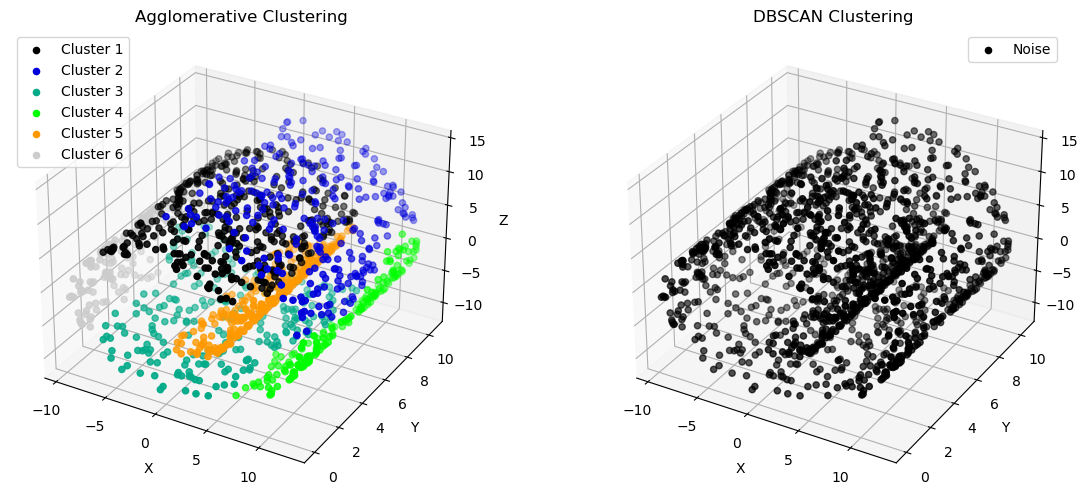

In [10]:
# Import the Required libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)  # You may need to adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(X)

# Create a 3D scatter plot with different colors for Agglomerative Clustering
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("Agglomerative Clustering")

# Define a color map for clusters
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 6))

for cluster_id in range(6):
    ax1.scatter(X[agg_labels == cluster_id, 0],
                X[agg_labels == cluster_id, 1],
                X[agg_labels == cluster_id, 2],
                c=[colors[cluster_id]],
                label=f'Cluster {cluster_id + 1}')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# Create a 3D scatter plot with different colors for DBSCAN clusters
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("DBSCAN Clustering")

# Get the number of clusters (excluding noise) for DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Define a color map for clusters
colors2 = plt.cm.nipy_spectral(np.linspace(0, 1, max(n_clusters_dbscan, 6) + 1))

for cluster_id in range(n_clusters_dbscan):
    ax2.scatter(X[dbscan_labels == cluster_id, 0],
                X[dbscan_labels == cluster_id, 1],
                X[dbscan_labels == cluster_id, 2],
                c=[colors2[cluster_id]],
                label=f'Cluster {cluster_id}')

# Noise points in DBSCAN
ax2.scatter(X[dbscan_labels == -1, 0],
            X[dbscan_labels == -1, 1],
            X[dbscan_labels == -1, 2],
            c=[colors2[n_clusters_dbscan]],
            label='Noise')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()

plt.show()


The code applies two different clustering algorithms, DBSCAN and Agglomerative Clustering, to a Swiss roll dataset and offers a basis for comparing their performance. Agglomerative Clustering is a hierarchical method that merges clusters based on proximity, and in this case, it is set to generate six clusters. On the other hand, DBSCAN is a density-based clustering algorithm that doesn't require a prior knowledge of the number of clusters and can identify clusters of varying shapes and densities. DBSCAN is also capable of explicitly identifying and handling noisy data points, a valuable feature when dealing with real-world data. The code visually presents the results in two 3D scatter plots, enabling a side-by-side comparison. While Agglomerative Clustering produces a fixed number of clusters and may not handle noise explicitly, DBSCAN can adapt to the dataset's characteristics, varying the number of clusters and identifying noise points. The choice between these methods should consider the dataset's features and the desired clustering outcomes. The code provides a useful illustration of how these two clustering techniques operate and their applicability to different scenarios.